# Model Training

## 1.1 Import Data and Required Packages

Import Pandas,Numpy,Matplotlib,Seaborn and Warning Library 

In [1]:
# basic import

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# modelling

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV
import warnings

Import the CSV data as Pandas DataFrame

In [3]:
df=pd.read_csv('data/stud.csv')

Show top 5 Records

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.shape

(1000, 8)

In [6]:
x=df.drop(columns=['math_score'],axis=1)
x

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75
...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,99,95
996,male,group C,high school,free/reduced,none,55,55
997,female,group C,high school,free/reduced,completed,71,65
998,female,group D,some college,standard,completed,78,77


In [14]:
print("Categories in gender variable: ", end="")
print(df['gender'].unique())
print("Categories in race ethnicity variable: ", end="")
print(df['race_ethnicity'].unique())
print("Categories in parental level of education variable: ", end="")
print(df['parental_level_of_education'].unique())
print("Categories in lunch variable: ", end="")
print(df['lunch'].unique())
print("Categories in test preparation course variable: ", end="")
print(df['test_preparation_course'].unique())

Categories in gender variable: ['female' 'male']
Categories in race ethnicity variable: ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental level of education variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch variable: ['standard' 'free/reduced']
Categories in test preparation course variable: ['none' 'completed']


In [17]:

y=df['math_score']
print(y)


0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64


In [24]:
num_features=x.select_dtypes(exclude='object').columns
print(num_features)
cat_features=x.select_dtypes(include='object').columns
print(cat_features)

Index(['reading_score', 'writing_score'], dtype='object')
Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course'],
      dtype='object')


In [25]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer=StandardScaler()
oh_transformer=OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder",oh_transformer,cat_features),
        ("StandardScaler",numeric_transformer,num_features),
    ]
)

In [26]:
X=preprocessor.fit_transform(x)

In [27]:
X.shape

(1000, 19)

separate dataset into test and train

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [35]:
x_train.shape, x_test.shape

((700, 19), (300, 19))

Create an evaluate function to give all metrics after model training

In [42]:
def evaluate_model(true,predicted):
    mae=mean_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted)
    rmse=np.sqrt(mean_squared_error(true,predicted))
    r2_square=r2_score(true,predicted)
    return mae,rmse,r2_square

In [61]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

model_list=[]
r2_list=[]

for i in range(len(models)):
    model = list(models.values())[i]
    model.fit(x_train,y_train) # train model

    #make predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    model_train_mae, model_train_rmse, model_train_r2_score = evaluate_model(y_train,y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2_score = evaluate_model(y_test,y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print("model performance for training dataset")
    print("- mean absolute error: {:.4f}".format(model_train_mae))
    print("- Root mean squared error: {:.4f}".format(model_train_rmse))
    print("- R2_score: {:.4f}".format(model_train_r2_score))
   
    print("--------------------------")

    print("model performance for testing dataset")
    print("- mean absolute error: {:.4f}".format(model_test_mae))
    print("- Root mean squared error: {:.4f}".format(model_test_rmse))
    print("- R2_score: ",model_test_r2_score)
    r2_list.append(model_test_r2_score)

    print("="*35)
    print("\n")

Linear Regression
model performance for training dataset
- mean absolute error: 4.2080
- Root mean squared error: 5.2679
- R2_score: 0.8742
--------------------------
model performance for testing dataset
- mean absolute error: 4.4779
- Root mean squared error: 5.6330
- R2_score:  0.8724693130062864


Lasso
model performance for training dataset
- mean absolute error: 5.1582
- Root mean squared error: 6.5106
- R2_score: 0.8078
--------------------------
model performance for testing dataset
- mean absolute error: 5.3929
- Root mean squared error: 6.8705
- R2_score:  0.8102810073900306


Ridge
model performance for training dataset
- mean absolute error: 4.1977
- Root mean squared error: 5.2487
- R2_score: 0.8751
--------------------------
model performance for testing dataset
- mean absolute error: 4.4155
- Root mean squared error: 5.5566
- R2_score:  0.875906778443454


K-Neighbors Regressor
model performance for training dataset
- mean absolute error: 4.5063
- Root mean squared error

Results

In [62]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
2,Ridge,0.875907
0,Linear Regression,0.872469
7,CatBoosting Regressor,0.852108
5,Random Forest Regressor,0.844739
8,AdaBoost Regressor,0.834339
6,XGBRegressor,0.811816
1,Lasso,0.810281
3,K-Neighbors Regressor,0.772528
4,Decision Tree,0.736105


Linear Regression

In [63]:
lin_model = LinearRegression(fit_intercept=True)
lin_model.fit(x_train,y_train)
y_pred = lin_model.predict(x_test)
score = r2_score(y_test,y_pred)
print("Accuracy of the model is %.2f" %score)

Accuracy of the model is 0.87


Plot y_pred and y_test

Text(0.5, 0, 'Actual')

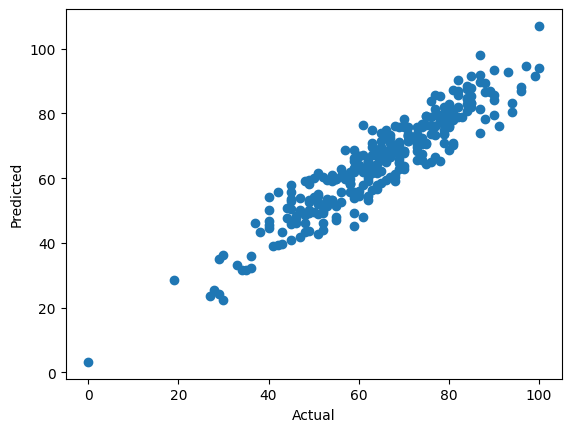

In [65]:
plt.scatter(y_test,y_pred)
plt.ylabel("Predicted")
plt.xlabel("Actual")

<Axes: xlabel='math_score'>

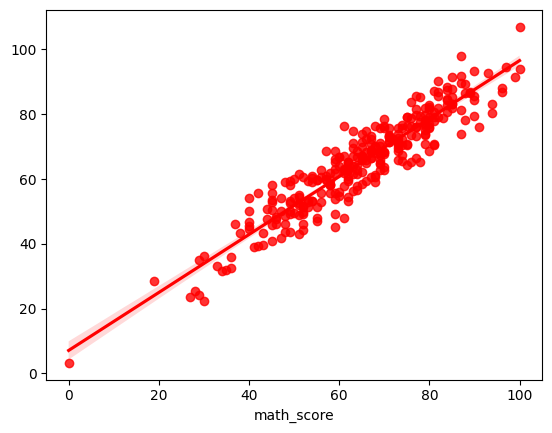

In [67]:
sns.regplot(x=y_test,y=y_pred,color="r")

In [68]:
pred_df=pd.DataFrame({"Actual Value":y_test,"Predicted":y_pred,"Difference":y_test-y_pred})
print(pred_df)

     Actual Value  Predicted  Difference
521            91     76.125      14.875
737            53     59.500      -6.500
740            80     77.125       2.875
660            74     76.750      -2.750
411            84     88.500      -4.500
..            ...        ...         ...
468            77     73.250       3.750
935            70     62.750       7.250
428            65     58.375       6.625
7              40     44.500      -4.500
155            70     78.375      -8.375

[300 rows x 3 columns]
